<a href="https://colab.research.google.com/github/nahilsobh/BBox-Label-Tool/blob/master/Colab2_for_deeplearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beyond Hello World, A Computer Vision Example
In the previous exercise you saw how to create a neural network that figured out the problem you were trying to solve. This gave an explicit example of learned behavior. Of course, in that instance, it was a bit of overkill because it would have been easier to write the function Y=2x-1 directly, instead of bothering with using Machine Learning to learn the relationship between X and Y for a fixed set of values, and extending that for all values.

But what about a scenario where writing rules like that is much more difficult -- for example a computer vision problem? Think about, for example, if you need to recognize handwritten digits. Lots of people have different handwriting, and write 0s or 4s or 7s differently. Writing code to interpret the pixels would be prohibitively difficult to do. 

But what about training a Neural Network on lots of digits like this, and having it figure out what a 0 looks like or a 4 or a 7. There's an open dataset that's available to use which contains 70,000 examples of handwritten digits. It's called MNIST, and you'll use it in this workbook to train a Neural Network to recognize handwritten digits!



## Start Coding

Let's start with our import of TensorFlow

In [0]:
import tensorflow as tf
print(tf.__version__)

1.13.0-rc0


The MNIST data is available directly in the tf.keras datasets API. You load it like this:

In [0]:
mnist = tf.keras.datasets.fashion_mnist

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the handwritten digits, and their labels (i.e. this image contains a '1', this image contains a '2' etc.)


In [0]:
( training_images, training_labels ) , ( test_images, test_labels )  = mnist.load_data()

What does these values look like? Let's print a training image, and a training label to see...Experiment with different indices in the array. For example, take a look at index 42...that's also a boot, but a very different looking one.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187
   26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237
  255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234
  238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3   0   0 194 

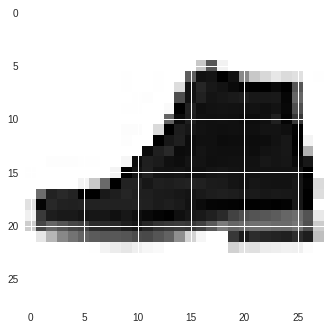

In [0]:
import matplotlib.pyplot as plt


print(      training_labels[42] )
print(      training_images[42] )
plt.imshow( training_images[42] )

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called '**normalizing**'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [0]:
training_images  = training_images / 255.0
test_images      =     test_images / 255.0

Now you might be wondering why there are 2 sets...training and testing -- remember we spoke about this in the intro? The idea is to have 1 set of data for training, and then another set of data...that the model hasn't yet seen...to see how good it would be at classifying values. After all, when you're done, you're going to want to try it out with data that it hadn't previously seen!

Let's now design the model. There's quite a few new concepts here, but don't worry, you'll get the hang of them. 

In [0]:
model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(), 
                                     tf.keras.layers.Dense  (128, activation=tf.nn.relu   ), 
                                     tf.keras.layers.Dense  ( 10, activation=tf.nn.softmax)
                                   ])

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now. 

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!


The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling **model.fit ** asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like. 

In [0]:
model.compile( optimizer = tf.train.AdamOptimizer(),
                    loss = 'sparse_categorical_crossentropy'
             )

model.fit    ( training_images, training_labels, epochs = 5 )

Epoch 1/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.5004
Epoch 2/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3738
Epoch 3/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3338
Epoch 4/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3137
Epoch 5/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2929


Once it's done training -- you should see a loss value at the end of the final epoch. It might look something like 0.2966. This tells you that your neural network is about 71% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 71% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images. We can call model.evaluate, and pass in the two sets, and it will report back the loss for each. Let's give it a try:

In [0]:
model.evaluate( test_images, test_labels )

10000/10000 [==============================] - 1s 68us/sample - loss: 0.3591


0.35913492546081544

For me, that returned a loss of about .35, which means it was about 65% accurate. As expected it probably would not do as well with *unseen* data as it did with data it was trained on!  As you go through this course, you'll look at ways to improve this. But for now try the below exercises:


# Exploration Exercises

##Exercise 1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent? 

In [0]:
classifications = model.predict( test_images )

print( classifications[0] )

[8.6249456e-06 8.4852576e-07 1.8120294e-06 3.8066042e-05 3.7273712e-05
 3.6313469e-03 7.4958734e-05 4.7926971e-01 5.0553330e-04 5.1643187e-01]


Hint: try running print(test_labels[0]) -- and you'll get a 7. Does that help you understand why this list looks the way it does? 

In [0]:
print(test_labels[0])

9


**Answer**: The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value, i.e. the first value in the list is the probability that the handwriting is of a '0', the next is a '1' etc. Notice that they are all VERY LOW probabilities.

For the 7, the probability was .999+, i.e. the neural network is telling us that it's almost certainly a 7.

##Exercise 2: 
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case? 

For example -- if I increase to 1024 neurons instead of 512 -- I can see that the training takes much longer than with 512 neurons. Explain why from a programmers perspective...consider each neuron is a function, and each connection is effectively a call forward to another function. By doubling the number of neurons we're executing double the functions, and we can see that the speed almost halves. But we don't have a significant improvement in loss.

So try 256 neurons, 128, 64, and other numbers. 


In [0]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

( training_images, training_labels ) , ( test_images, test_labels )  = mnist.load_data()

training_images = training_images/255.0
test_images     =     test_images/255.0

model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense  (64, activation=tf.nn.relu   ),
                                     tf.keras.layers.Dense  (10, activation=tf.nn.softmax)
                                   ])

model.compile (  optimizer = 'adam',
                      loss = 'sparse_categorical_crossentropy'
              )

model.fit     ( training_images, training_labels, epochs = 5 )
model.evaluate(     test_images,     test_labels             )     

classifications = model.predict( test_images )

print( classifications[0] )
print(     test_labels[0] )

1.13.0-rc0
Epoch 1/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3149
Epoch 2/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1520
Epoch 3/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1122
Epoch 4/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0881
Epoch 5/5
10000/10000 [==============================] - 1s 62us/sample - loss: 0.0907
[2.6275045e-06 9.6940660e-09 2.7453741e-05 2.5078593e-04 3.9813575e-10
 5.2193582e-07 4.2841192e-13 9.9970990e-01 2.1810133e-06 6.6429570e-06]
7


##Exercise 3: 

What would happen if you remove the Flatten() layer. Why do you think that's the case? 

You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

In [0]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

( training_images, training_labels ) , ( test_images, test_labels )  = mnist.load_data()

training_images = training_images/255.0
test_images     =     test_images/255.0

model = tf.keras.models.Sequential([ #tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(64, activation=tf.nn.relu   ),
                                     tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                   ])
 
model.compile ( optimizer = 'adam',
                     loss = 'sparse_categorical_crossentropy'
              )

model.fit     ( training_images, training_labels, epochs = 5 )
model.evaluate(     test_images,     test_labels             )

classifications = model.predict( test_images )

print( classifications[0] )
print(     test_labels[0] )

1.13.0-rc0
Epoch 1/5


InvalidArgumentError: ignored

##Exercise 4: 

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5

You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

In [1]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

( training_images, training_labels ) , ( test_images, test_labels )  = mnist.load_data()

training_images = training_images/255.0
test_images     =     test_images/255.0

model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense  (64, activation=tf.nn.relu),
                                     tf.keras.layers.Dense  ( 5, activation=tf.nn.softmax)
                                   ])

model.compile ( optimizer = 'adam',
                     loss = 'sparse_categorical_crossentropy'
              )

model.fit     ( training_images, training_labels, epochs=5)
model.evaluate(     test_images,     test_labels)

classifications = model.predict( test_images )

print( classifications[0] )
print(     test_labels[0] )

1.13.0-rc0
11501568/11490434 [==============================] - 0s 0us/step
Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/5


InvalidArgumentError: ignored

##Exercise 5: 

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10. 

Ans: There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary. 

In [2]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

( training_images, training_labels ) , ( test_images, test_labels )  = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense  (512, activation=tf.nn.relu   ),
                                     tf.keras.layers.Dense  (256, activation=tf.nn.relu   ),
                                     tf.keras.layers.Dense  ( 10, activation=tf.nn.softmax)
                                   ])

model.compile ( optimizer = 'adam',
                     loss = 'sparse_categorical_crossentropy'
              )

model.fit     (training_images, training_labels, epochs=5)
model.evaluate(    test_images,     test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(    test_labels[0])

1.13.0-rc0
Epoch 1/5
60000/60000 [==============================] - 20s 337us/sample - loss: 0.1883
Epoch 2/5
60000/60000 [==============================] - 20s 336us/sample - loss: 0.0802
Epoch 3/5
60000/60000 [==============================] - 20s 340us/sample - loss: 0.0545
Epoch 4/5
60000/60000 [==============================] - 20s 325us/sample - loss: 0.0396
Epoch 5/5
10000/10000 [==============================] - 1s 76us/sample - loss: 0.0942
[4.5032220e-12 2.7486212e-07 1.5032551e-08 7.3226106e-06 1.4489748e-10
 4.7413551e-10 2.4803590e-12 9.9998879e-01 1.6810054e-08 3.6624560e-06]
7


#Exercise 6: 

Consider the impact of training for more or less epochs. Why do you think that would be the case? 

Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting' which you can learn about [somewhere] and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

In [3]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

( training_images, training_labels ) , ( test_images, test_labels )  = mnist.load_data()

training_images = training_images/255.0
test_images     =     test_images/255.0

model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense  (128, activation=tf.nn.relu),
                                     tf.keras.layers.Dense  ( 10, activation=tf.nn.softmax)
                                   ])

model.compile ( optimizer = 'adam',
                     loss = 'sparse_categorical_crossentropy'
              )

model.fit     (training_images, training_labels, epochs = 15 )
model.evaluate(    test_images,     test_labels)

classifications = model.predict( test_images )

print( classifications[34] )
print(     test_labels[34] )

1.13.0-rc0
Epoch 1/15
60000/60000 [==============================] - 8s 128us/sample - loss: 0.2598
Epoch 2/15
60000/60000 [==============================] - 7s 115us/sample - loss: 0.1159
Epoch 3/15
60000/60000 [==============================] - 7s 116us/sample - loss: 0.0805
Epoch 4/15
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0603
Epoch 5/15
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0465
Epoch 6/15
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0369
Epoch 7/15
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0293
Epoch 8/15
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0250
Epoch 9/15
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0188
Epoch 10/15
60000/60000 [==============================] - 8s 138us/sample - loss: 0.0166
Epoch 11/15
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0127
Epoch 12

#Exercise 7: 

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results? 

In [4]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist
( training_images, training_labels ) , ( test_images, test_labels )  = mnist.load_data()

# training_images = training_images/255.0
# test_images     =     test_images/255.0

model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense  (512, activation=tf.nn.relu),
                                     tf.keras.layers.Dense  ( 10, activation=tf.nn.softmax)
                                   ])

model.compile ( optimizer = 'adam', 
                     loss = 'sparse_categorical_crossentropy'
              )

model.fit     (training_images, training_labels, epochs = 5 )
model.evaluate(    test_images,     test_labels)

classifications = model.predict(test_images)

print( classifications[0] )
print(     test_labels[0] )

1.13.0-rc0
Epoch 1/5
60000/60000 [==============================] - 16s 265us/sample - loss: 14.4725
Epoch 2/5
60000/60000 [==============================] - 15s 254us/sample - loss: 14.4711
Epoch 3/5
60000/60000 [==============================] - 16s 258us/sample - loss: 14.4711
Epoch 4/5
60000/60000 [==============================] - 16s 259us/sample - loss: 14.4711
Epoch 5/5
10000/10000 [==============================] - 1s 65us/sample - loss: 14.4902
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
7


#Exercise 8: 

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [5]:
import tensorflow as tf
print(tf.__version__)

#------------------------------------------------------------
class myCallback(tf.keras.callbacks.Callback):
#------------------------------------------------------------
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.05):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True
#------------------------------------------------------------

callbacks = myCallback()

mnist = tf.keras.datasets.mnist

( training_images, training_labels ) , ( test_images, test_labels )  = mnist.load_data()

training_images = training_images/255.0
test_images     =     test_images/255.0

model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense  (512, activation=tf.nn.relu),
                                     tf.keras.layers.Dense  ( 10, activation=tf.nn.softmax)
                                   ])
model.compile ( optimizer = 'adam', 
                     loss = 'sparse_categorical_crossentropy'
              )
 
model.fit     ( training_images, 
                training_labels, 
                epochs    = 5  , 
                callbacks = [callbacks]
              )

#model.evaluate( test_images, test_labels )
#
#classifications = model.predict( test_images )
#
#print( classifications[0] )
#print(     test_labels[0] )

1.13.0-rc0
Epoch 1/5
60000/60000 [==============================] - 16s 267us/sample - loss: 0.1994
Epoch 2/5
60000/60000 [==============================] - 16s 265us/sample - loss: 0.0803
Epoch 3/5
60000/60000 [==============================] - 16s 265us/sample - loss: 0.0532
Epoch 4/5
59808/60000 [============================>.] - ETA: 0s - loss: 0.0369
Reached 95% accuracy so cancelling training!
60000/60000 [==============================] - 15s 257us/sample - loss: 0.0370
